In [1]:
import pandas as pd
pd.options.display.max_rows = 200

from IPython.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

### Valores 2010 para variables seleccionadas.

In [2]:
frac = 0.01

In [3]:
df_list = []

for Q in ['2010-02-15', '2010-02-15', '2010-02-15', '2010-02-15']:
    df_ = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_q'+Q+'.csv')
    
    df_list += [df_]
    
df = pd.concat(df_list)

In [4]:
len(df)/frac/4

40005400.0

In [5]:
df['CONDACT'] = df['CONDACT'].map({0: 'Menor de 14', 1: 'Ocup', 2: 'Desoc', 3: 'Inac'})
df['CAT_OCUP'] = df['CAT_OCUP'].map({0: 'n.a.', 1: 'Patron', 2: 'C. Propia', 3: 'Empleado', 4: 'Familiar'})
df['CAT_INAC'] = df['CAT_INAC'].map({0: 'n.a.', 1: 'Jubil', 2: 'Renta', 3: 'Estud', 4: 'Ama Casa', 5: 'Menor de 6', 6: 'Discap', 7: 'Otros'})


In [6]:
df.columns

Index(['index', 'RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
       'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
       'CAT_OCUP', 'CAT_INAC', 'P47T_persona', 'ANO4', 'Q', 'P0910',
       'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
       'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
       'Pobreza_5usd', 'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV',
       'NOMPROV', 'AGLOMERADO', 'Region'],
      dtype='object')

In [7]:
tabla = df.groupby(['CONDACT', 'CAT_OCUP', 'CAT_INAC']).size().unstack([-2, -1]).sort_index(axis = 1)/4/frac
show = (tabla/1e6).round(2).fillna(0).replace(0, '')
show.to_excel('./personas_pob_total_CONDACT-CAT_OCUP-CAT_INAC.xlsx')
show

CAT_OCUP    C. Propia Empleado Familiar Patron     n.a.                     \
CAT_INAC         n.a.     n.a.     n.a.   n.a. Ama Casa Discap Estud Jubil   
CONDACT                                                                      
Desoc            0.06     1.32                                               
Inac                                               3.06   0.03  2.98  3.89   
Menor de 14               0.04                                  5.39         
Ocup             1.02    17.37     0.01   0.07                               

CAT_OCUP                                  
CAT_INAC    Menor de 6 Otros Renta  n.a.  
CONDACT                                   
Desoc                               0.05  
Inac                    0.44              
Menor de 14       3.99  0.07        0.21  
Ocup                                0.01

In [8]:
# tabla.sum().reset_index().astype(int)

In [9]:
tabla = df.groupby(['NOMPROV', 'CONDACT', 'CAT_OCUP', 'CAT_INAC']).size().unstack([-2, -1]).sort_index(axis = 1)/4/frac

In [10]:
show = (tabla/1e3).round(1).fillna(0).replace(0, '')
show.to_excel('./personas_pob_total_NOMPROV-CONDACT-CAT_OCUP-CAT_INAC.xlsx')
show

CAT_OCUP                                    C. Propia Empleado Familiar  \
CAT_INAC                                         n.a.     n.a.     n.a.   
NOMPROV                         CONDACT                                   
Buenos Aires                    Desoc            26.3    543.0            
                                Inac                                      
                                Menor de 14               11.3            
                                Ocup            412.5   7090.0      2.5   
Catamarca                       Desoc             0.4     12.4            
                                Inac                                      
                                Menor de 14                2.1            
                                Ocup              9.2    145.4      0.3   
Chaco                           Desoc             1.6     25.0            
                                Inac                                      
                                Menor de 14                0.5            
                                Ocup             31.0    376.5      0.8   
Chubut                          Desoc             0.7     16.8            
                                Inac                                      
                                Menor de 14                3.2            
                                Ocup             10.8    233.4            
Ciudad Autónoma de Buenos Aires Desoc             3.4     89.6            
                                Inac                                      
                                Menor de 14                3.1            
                                Ocup             73.5   1555.5      0.1   
Corrientes                      Desoc             0.8     24.8            
                                Inac                                      
                                Menor de 14                0.1            
                                Ocup             24.4    356.4      0.5   
Córdoba                         Desoc             5.8    102.5            
                                Inac                                      
                                Menor de 14                3.1            
                                Ocup             85.8   1445.3      0.4   
Entre Ríos                      Desoc             0.9     30.1            
                                Inac                                      
                                Menor de 14                0.4            
                                Ocup             33.8    506.4      0.2   
Formosa                         Desoc             0.4     12.1            
                                Inac                                      
                                Menor de 14                0.2            
                                Ocup             15.4    182.2      0.4   
Jujuy                           Desoc             0.6     22.0            
                                Inac                                      
                                Menor de 14                0.2            
                                Ocup             14.6    263.2      0.3   
La Pampa                        Desoc             0.4      9.4            
                                Inac                                      
                                Menor de 14                0.2            
                                Ocup             10.5    138.0            
La Rioja                        Desoc             0.4     12.7            
                                Inac                                      
                                Menor de 14                0.1            
                                Ocup              5.0    143.3            
Mendoza                         Desoc             2.8     68.5            
                                Inac                                      
                         

### Tabla: Poblacion en pobreza por aglomerado

In [11]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')
base_str = 'P'; grouper = ['Q', 'AGLOMERADO']; frac = 0.01
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'_'+str(frac)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Chequea valores de distintos timestamps
# info.groupby(['observable', 'sintetico', 'base'] + grouper).nunique().value_counts()

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()
# info.timestamp.hist()

## Introducir nombres de aglomerados
nomaglos = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
info['AGLOMERADO'] = info['AGLOMERADO'].map(dict(nomaglos.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [12]:
info.nunique()

observable       4
sintetico        7
base             1
Q                8
AGLOMERADO      33
timestamp        8
valor         1512
frac             1
dtype: int64

In [13]:
pobreza_sum = info.loc[(info.observable.isin(['Total', 'Pobreza'])) & (info.sintetico == 'sum')]

tabla_custom = pobreza_sum.set_index(grouper + ['observable'])['valor'].unstack([-2, -1]).T.sort_index()/1e3

tabla_custom.head(20)

Q                           2010-02-15  2010-05-15  2010-08-15  2010-11-15  \
AGLOMERADO      observable                                                   
Bahia Blanca    Pobreza           84.2        97.4        90.8        93.5   
                Total            293.7       293.7       293.7       293.7   
CABA            Pobreza          450.7       494.1       437.0       457.2   
                Total           2867.9      2867.9      2867.9      2867.9   
Catamarca       Pobreza           64.7        76.1        68.4        70.0   
                Total            175.6       175.6       175.6       175.6   
Cdro Rivadavia  Pobreza           29.6        35.6        31.0        36.6   
                Total            160.0       160.0       160.0       160.0   
Concordia       Pobreza           70.2        82.1        70.7        75.6   
                Total            150.5       150.5       150.5       150.5   
Cordoba         Pobreza          470.5       525.2       480.5       489.3   
                Total           1447.5      1447.5      1447.5      1447.5   
Corrientes      Pobreza          157.4       169.5       153.8       170.2   
                Total            340.0       340.0       340.0       340.0   
Formosa         Pobreza          101.2       116.0       103.5       107.7   
                Total            220.4       220.4       220.4       220.4   
Fuera de aglom. Pobreza         7165.4      7832.2      7209.6      7681.7   
                Total          14760.6     14760.6     14760.6     14760.6   
GBA             Pobreza         4119.8      4425.5      3961.6      4285.6   
                Total          10671.2     10671.2     10671.2     10671.2   

Q                           2011-02-15  2011-05-15  2011-08-15  2011-11-15  
AGLOMERADO      observable                                                  
Bahia Blanca    Pobreza           77.3        89.3        86.9        83.9  
                Total            288.0       288.0       288.0       288.0  
CABA            Pobreza          403.0       491.2       373.1       407.0  
                Total           2928.9      2928.9      2928.9      2928.9  
Catamarca       Pobreza           60.2        77.5        65.7        75.9  
                Total            180.5       180.5       180.5       180.5  
Cdro Rivadavia  Pobreza           35.8        45.9        35.5        41.9  
                Total            162.4       162.4       162.4       162.4  
Concordia       Pobreza           64.9        79.9        71.6        78.7  
                Total            149.2       149.2       149.2       149.2  
Cordoba         Pobreza          443.0       542.4       446.2       459.6  
                Total           1466.2      1466.2      1466.2      1466.2  
Corrientes      Pobreza          161.2       162.8       160.4       160.8  
                Total            344.3       344.3       344.3       344.3  
Formosa         Pobreza          111.4       120.5       115.1       113.8  
                Total            229.4       229.4       229.4       229.4  
Fuera de aglom. Pobreza         6930.8      7730.5      7072.2      7326.0  
                Total          15165.5     15165.5     15165.5     15165.5  
GBA             Pobreza         3911.2      4273.0      3836.6      3996.6  
                Total          10738.8     10738.8     10738.8     10738.8

In [14]:
tabla_custom.to_excel('./personas_pob_total_AGLO.xlsx')

### Grafico: Dist ingresos por AGLO

In [15]:
import numpy as np


In [16]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'M24'; grouper = ['Q', 'AGLOMERADO']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'_'+str(frac)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Chequea valores de distintos timestamps
# info.groupby(['observable', 'sintetico', 'base'] + grouper).nunique().value_counts()

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()
# info.timestamp.hist()

## Introducir nombres de aglomerados
nomaglos = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
info['AGLOMERADO'] = info['AGLOMERADO'].map(dict(nomaglos.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [17]:
ingresos = info.loc[info.observable.str.contains('P47T_')]
# info.observable.unique()
ingresos = ingresos[['sintetico', 'Q', 'AGLOMERADO', 'valor']]


In [18]:
ingresos_17 = ingresos.loc[ingresos['Q'].dt.year == 2010]

In [19]:
data = ingresos_17.groupby(['AGLOMERADO', 'sintetico'])['valor'].mean().unstack().sort_values('mean')

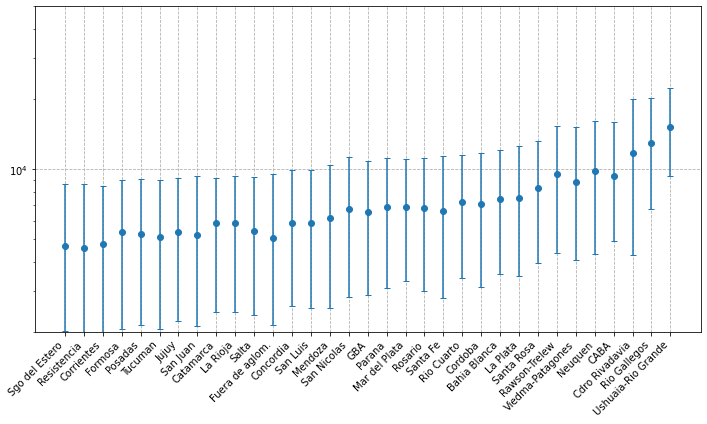

In [20]:
# _2017 = ['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15']

# tabla_custom[_2017]

import matplotlib.pyplot as plt
 
nAGLOS = ingresos['AGLOMERADO'].nunique()
x = range(nAGLOS)


y = data['median']

# creating error
y_errormin = data['median'] - data['q25']
y_errormax = data['q75'] - data['median']

x_error = 0
y_error =[y_errormin, y_errormax]
 
# plotting graph
# plt.plot(x, y)
fig, ax = plt.subplots(1, figsize = (10, 6))
plt.errorbar(x, y, capsize = 3,
             yerr = y_error,
             xerr = x_error,
             fmt ='o')

ax.set_yticks(np.arange(2e3, 5e4, 2e3)); 
ax.set_xticks(range(nAGLOS))
ax.set_xticklabels(data.index.values)

plt.yscale('log'); plt.ylim(2e3, 5e4)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle = '--')
plt.savefig('./example_fig.png')
plt.show()

### Tabla: Poblacion en pobreza por provincia y Aglo si/no

In [21]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'P'; grouper = ['Q', 'PROV', 'AGLO_si']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'_'+str(frac)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()

## Introducir nombres de provincia
nomprovs = pd.read_csv('./../data/info/prov_regs.csv')[['PROV', 'NOMPROV']]
info['PROV'] = info['PROV'].map(dict(nomprovs.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [22]:
pobreza_sum = info.loc[(info.observable.isin(['Total', 'Pobreza'])) & (info.sintetico == 'sum')]

tabla_custom = pobreza_sum.set_index(grouper + ['observable'])['valor'].unstack([-3, -2, -1]).T.sort_index()/1e3

tabla_custom.head()

Q                                2010-02-15  2010-05-15  2010-08-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza         1156.7      1264.9      1125.6   
                     Total           3104.1      3104.1      3104.1   
             True    Pobreza         4689.0      5064.3      4535.7   
                     Total          12512.2     12512.2     12512.2   
Catamarca    False   Pobreza          118.4       123.2       115.9   

Q                                2010-11-15  2011-02-15  2011-05-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza         1217.4      1101.1      1270.7   
                     Total           3104.1      3174.8      3174.8   
             True    Pobreza         4904.7      4398.3      4856.3   
                     Total          12512.2     12555.7     12555.7   
Catamarca    False   Pobreza          121.0       105.6       104.0   

Q                                2011-08-15  2011-11-15  
PROV         AGLO_si observable                          
Buenos Aires False   Pobreza         1081.3      1173.2  
                     Total           3174.8      3174.8  
             True    Pobreza         4336.9      4529.5  
                     Total          12555.7     12555.7  
Catamarca    False   Pobreza          111.3       109.1

In [23]:
tabla_custom.to_excel('./personas_pob_total_PROV_AGLOsi.xlsx')

## Graficos:

### Barras para cantidad de pobreza

In [24]:
_2017 = ['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15']

data = tabla_custom[_2017].mean(1).unstack([-1, -2]).sort_index(axis = 1)
data.head()

KeyError: "None of [Index(['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15'], dtype='object', name='Q')] are in the [columns]"

In [ ]:
# import matplotlib.pyplot as plt
# colors = plt.cm.Paired.colors

# fig, ax = plt.subplots(1, figsize = (15, 10))
# # (data['Pobreza']+data['Total']).plot(kind='bar', color=[colors[1], colors[0]], rot=0, ax=ax) # stacked
# data['Total'].plot(kind='bar', color=['.5', '.5'], rot=0, ax=ax, alpha = .5)
# data['Pobreza'].plot(kind='bar', color=[colors[3], colors[2]], rot=0, ax=ax, alpha = 1)

# # legend_labels = [f'{val} ({context})' for val, context in data.columns]
# # ax.legend(legend_labels)

# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### Ingreso por provincia